# 🛒 BigMart Sales Prediction using XGBoost Regressor

## 📌 Project Overview
The objective of this project is to develop a regression model that can accurately predict the sales of various products at BigMart outlets based on historical sales data and product features.

This problem is inspired by a real-world retail scenario where understanding sales patterns can help optimize inventory, plan marketing strategies, and improve decision-making.

---

## 🎯 Goal
To build a robust machine learning model using the **XGBoost Regressor**, which can:
- Learn complex non-linear relationships between features and sales.
- Handle missing data and categorical variables efficiently.
- Generalize well to unseen product-store combinations.

---

## 📚 Key Steps in the Notebook
- **Data Cleaning & Preprocessing**
- **Exploratory Data Analysis (EDA)**
- **Feature Engineering**
- **Model Building with XGBoost**
- **Model Evaluation using RMSE**
- **Prediction on Test Data**

---

## 🧠 Tech Stack
- Python
- Pandas, NumPy
- Matplotlib, Seaborn (for EDA)
- Scikit-learn
- XGBoost

---

## 📊 Dataset
The dataset contains information about:
- Item characteristics (type, weight, MRP, etc.)
- Store details (type, size, location)
- Historical sales data

---



In [289]:
#importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


## Data Preprocessing

In [290]:
#Creating Pandas DataFrame from the CSv File

sale_data=pd.read_csv('BigMart.csv')

In [291]:
#Priting first 5 Row

sale_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [292]:
#Checking Row and Columns of Data

sale_data.shape

(8523, 12)

In [293]:
#Getting some information abt the Dataset

sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

- Item_Identifier            
- Item_Fat_Content           
- Item_Type  
- Outlet_Identifier          
- Outlet_Size                
- Outlet_Location_Type 
- Outlet_Type                                  

In [294]:
#Checking The Missing Value in each Columns

sale_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Value

Mean -> Average Value

Mode -> Most Repeated Value


Replacing Item weight missing Value with Mean

In [295]:
#Mean value of "Item_Weight"columns
sale_data['Item_Weight'].mean()

np.float64(12.857645184135977)

In [296]:
#Filling the Missing Value in "Item_Weight" column

sale_data['Item_Weight'].fillna(sale_data['Item_Weight'].mean(), inplace=True)

C:\Users\Priyanshu tiwari\AppData\Local\Temp\ipykernel_27392\408607109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sale_data['Item_Weight'].fillna(sale_data['Item_Weight'].mean(), inplace=True)


In [297]:
#Checking The Missing Value in each Columns

sale_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing Value in 'Outlet_Size' with Mode

In [298]:
mode_of_outlet_size=sale_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [299]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [300]:
missing_values=sale_data['Outlet_Size'].isnull()

In [301]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [302]:
sale_data.loc[missing_values, 'Outlet_Size']=sale_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [303]:
#Checking The Missing Value in each Columns

sale_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [304]:
sale_data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [305]:
sale_data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## Data Ananlysis

In [306]:
#Stastical Measure of Data

sale_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Numerical Features**

In [307]:
sns.set()

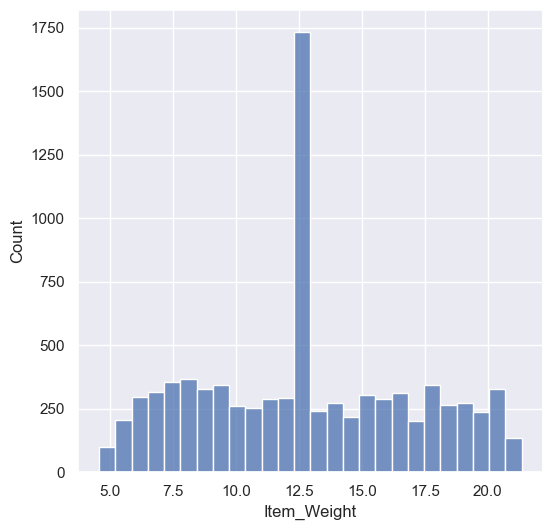

In [308]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.histplot(sale_data['Item_Weight'])
plt.show()

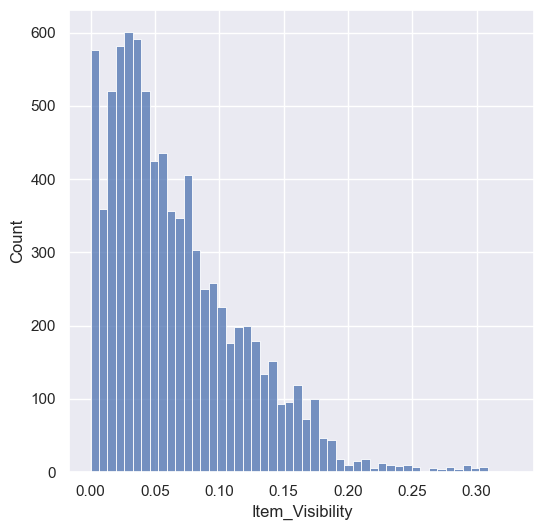

In [309]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(sale_data['Item_Visibility'])
plt.show()

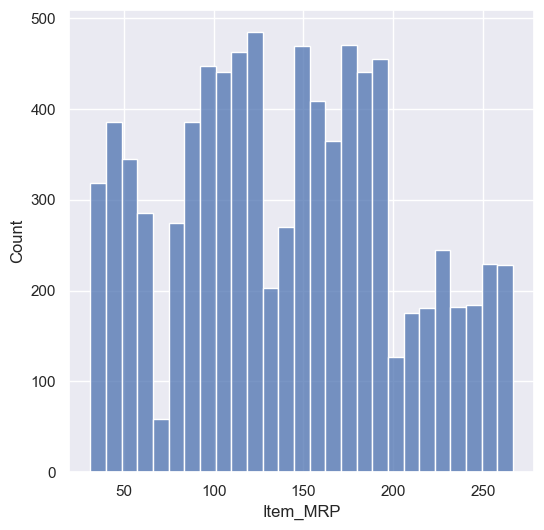

In [310]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(sale_data['Item_MRP'])
plt.show()

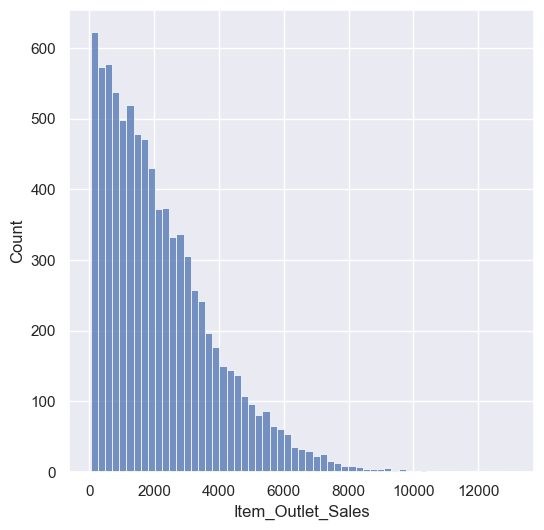

In [311]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(sale_data['Item_Outlet_Sales'])
plt.show()

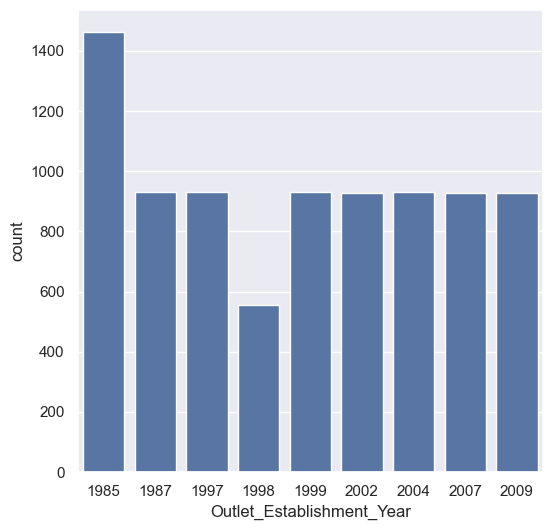

In [312]:
#Outlet_Establishment_Year Column


plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=sale_data)
plt.show()

**Categorical Feature**

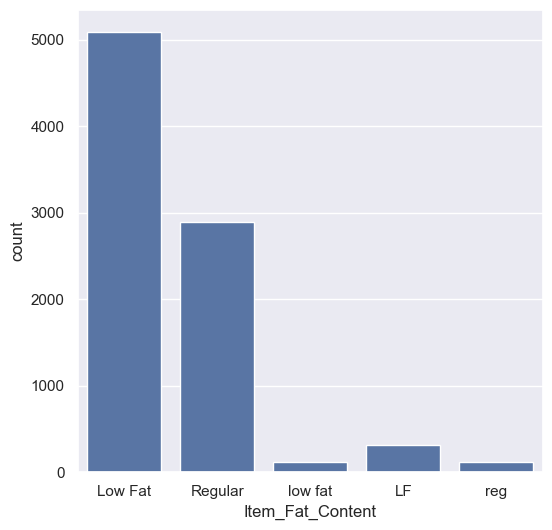

In [313]:
#Item_Fat_content Column


plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=sale_data)
plt.show()

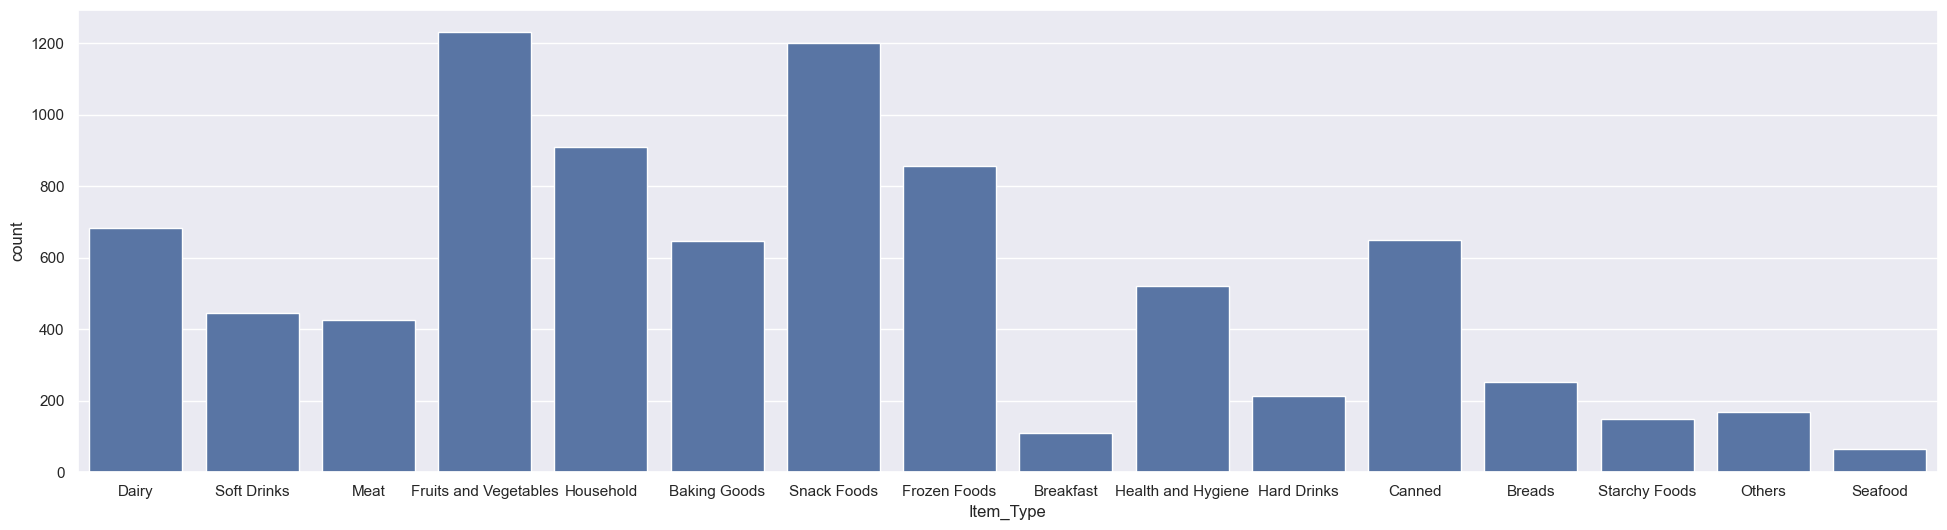

In [314]:
#Item_Type Column


plt.figure(figsize=(24,6))
sns.countplot(x='Item_Type', data=sale_data)
plt.show()

In [315]:
#Outlet_Size Column


plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=sale_data)
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 600x600 with 0 Axes>

**Data Preprocessing**

In [ ]:
sale_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
sale_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}},inplace=True)

In [ ]:
sale_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

**Lable Encoding**

In [ ]:
encoder=LabelEncoder()

In [ ]:
sale_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
sale_data['Item_Fat_Content']= encoder.fit_transform(sale_data['Item_Fat_Content'])
sale_data['Item_Type']= encoder.fit_transform(sale_data['Item_Type'])

sale_data['Outlet_Location_Type']= encoder.fit_transform(sale_data['Outlet_Location_Type'])
sale_data['Outlet_Type']= encoder.fit_transform(sale_data['Outlet_Type'])
sale_data['Item_Identifier']= encoder.fit_transform(sale_data['Item_Identifier'])
sale_data['Outlet_Identifier']= encoder.fit_transform(sale_data['Outlet_Identifier'])

In [ ]:
# Convert to string and flatten
sale_data['Outlet_Size'] = sale_data['Outlet_Size'].astype(str)


In [ ]:
sale_data['Outlet_Size']= encoder.fit_transform(sale_data['Outlet_Size'])

In [ ]:
sale_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Splitting the data into Features and Traget

In [ ]:
X=sale_data.drop(columns='Item_Outlet_Sales', axis=1)
Y=sale_data['Item_Outlet_Sales']

In [ ]:
#Splitting Data into Trainging and Testing Data

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Training the Model usinf Training Data**